In [1]:
import os
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import h5py
from scipy.stats import pearsonr
import statsmodels.stats.multitest as smm
import seaborn
import pickle

In [2]:
most_expressed_transcript_idx, most_varying_feature_idx, results = pickle.load(open(GTEx_directory + '/data/raw_quick_pvalues.py','rb'))

In [4]:
filt_mean_features = {}
with h5py.File(GTEx_directory + '/data/new_raw_inceptionet_aggregations.hdf5','r') as f:
    expression = f['lung']['256']['expression'].value
    filt_expression = expression[:, most_expressed_transcript_idx]
    for s in ['128','256','512','1024','2048','4096']:
        size_mean_features = f['lung'][s]['mean'].value
        filt_mean_features[s] = size_mean_features[:,most_varying_feature_idx]
        
    expression_IDs = f['lung']['256']['expression_IDs'].value

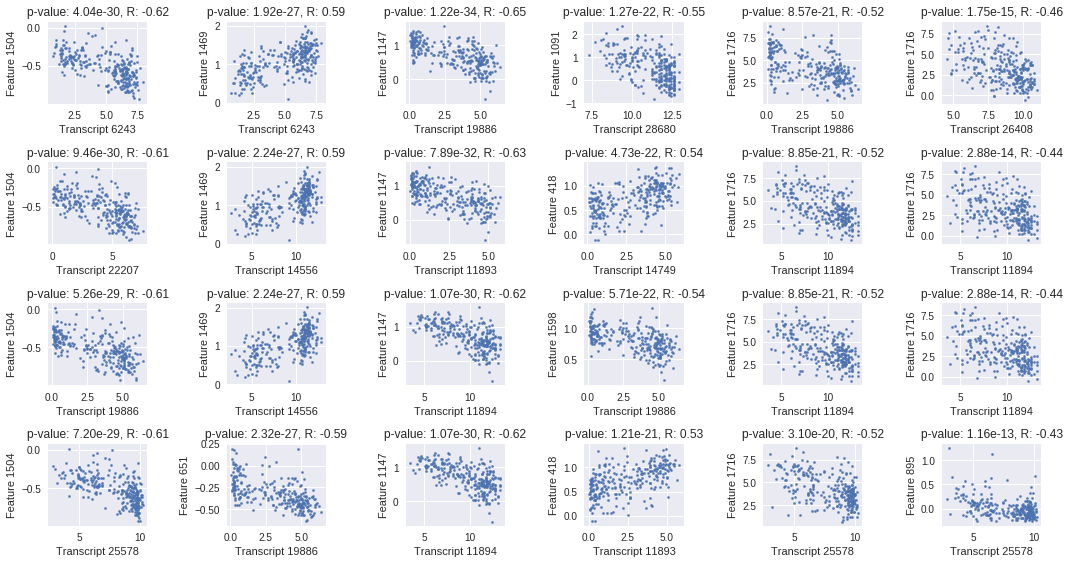

In [5]:
fig, ax = plt.subplots(4,6,figsize=(15,8))
aggregation = 'mean'
for (s,size) in enumerate(['128','256','512','1024','2048','4096']):
    pvalues = results['{}_{}_pvalues'.format(aggregation,size)]
    R_matrix = results['{}_{}_R'.format(aggregation,size)]
    N, M = pvalues.shape



    for k in range(4):
        value = np.sort(pvalues.flatten())[k]
        row, col = np.argwhere(pvalues == value)[0]

    #     print ('pvalue: {:0.2e}'.format(pvalues[row,col]))
    #     print ('R: {:0.2f}'.format(R_matrix[row,col]))

        f = filt_mean_features[str(size)][:,row]
        t = filt_expression[:,col]
        ax[k][s].set_title('p-value: {:0.2e}, R: {:0.2f}'.format(pvalues[row,col], R_matrix[row,col]))
        ax[k][s].set_xlabel('Transcript {}'.format(np.array(range(len(expression_IDs)))[most_expressed_transcript_idx][col]))
        ax[k][s].set_ylabel('Feature {}'.format(np.array(range(size_mean_features.shape[1]))[most_varying_feature_idx][row]))
        ax[k][s].scatter(t,f,s=5)
    fig.tight_layout()

In [20]:
aggregation = 'mean'
size = 256
pvalues = results['{}_{}_R'.format(aggregation,size)]

largest_pvalue_pairs = np.array([np.argwhere(np.argsort(pvalues.flatten()).reshape(pvalues.shape) == i) for i in range(len(pvalues) - 10, len(pvalues))])


In [33]:
min(results['{}_{}_R'.format(aggregation,size)].flatten())

5.3769453145902996e-42

In [29]:
results['{}_{}_pvalues'.format(aggregation,size)][largest_pvalue_pairs[-1][0][0],largest_pvalue_pairs[-1][0][1]]

0.22324804961681366

5.3769453145902996e-42